In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

2024-07-11 20:46:53.107778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 20:46:53.107943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 20:46:53.252793: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Creating a Toy Dataset from Tensors**
--

In [2]:
# Creating a tensor
X = tf.range(10)
print("Tensor: ", X)

dataset = tf.data.Dataset.from_tensor_slices(X)
print("Dataset: ", dataset)

Tensor:  tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
Dataset:  <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


**Important**
- The created dataset is a combination of all the values in the input tensor.
- Each instance of the dataset is a slice of the tensor along the first axis.

In [3]:
# Traversing through the dataset
for instance in dataset:
    print(instance)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [4]:
Nested_X = {
    "a":([1, 2, 3], [4, 5, 6]),
    "b":[7, 8, 9]
}

# Creating a dataset from nested lists
nested_dataset = tf.data.Dataset.from_tensor_slices(Nested_X)
for item in nested_dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


**Chaining Transformations**
--

- Every transformation applied on the dataset returns a new dataset.
- The below dataset is repeated 5 times and then split into batches of length 8.

In [5]:
dataset = dataset.repeat(5).batch(8)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32)
tf.Tensor([8 9 0 1 2 3 4 5], shape=(8,), dtype=int32)
tf.Tensor([6 7 8 9 0 1 2 3], shape=(8,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0 1], shape=(8,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8 9], shape=(8,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


**Important**
- To keep the sizes of all the batches in the dataset same we can drop and ragged batch.
- This can be done by setting the `drop_remainder` parameter to **True**.

In [6]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)

dataset = dataset.repeat(5).batch(8, drop_remainder=True)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32)
tf.Tensor([8 9 0 1 2 3 4 5], shape=(8,), dtype=int32)
tf.Tensor([6 7 8 9 0 1 2 3], shape=(8,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0 1], shape=(8,), dtype=int32)
tf.Tensor([2 3 4 5 6 7 8 9], shape=(8,), dtype=int32)
tf.Tensor([0 1 2 3 4 5 6 7], shape=(8,), dtype=int32)


**Important**
- While map() can be used to apply more complex transformations on the dataset the function utilised by the map() should be a TensorFlow convertible function.

In [7]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)

# Applying Integer Transformations
dataset = dataset.map(lambda x: x * 2).repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [8]:
# Applying conditional selection
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


**Important**
- Each of the above transformations were applied to the dataset instance-wise.
- The API also accepts functions that can apply transformations on the dataset as a whole.

In [9]:
# Unbatching all the instances of the dataset
dataset = dataset.apply(tf.data.experimental.unbatch())
for item in dataset:
    print(item)

tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)


In [10]:
# Viewing the first 5 examples
for item in dataset.take(5):
    print(item)

tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


**Shuffling the Data**
--

- Shuffling using the shuffle() utilises a bounded buffer.
- A buffer of fixed size randomly picks up samples from the dataset untill all the instances are utilised.
- Each time a random sample is requested they are taken from the buffer.
- The choice of buffer size plays an important role in the randomness of the samples in the batches being generated.

In [11]:
# Creating a Dataset from a Tensor
dataset = tf.data.Dataset.range(10).repeat(4)

# Shuffling the Dataset
shuffled_dataset = dataset.shuffle(buffer_size=4, seed=17).batch(7)
for item in shuffled_dataset:
    print(item)

tf.Tensor([3 1 5 6 7 2 8], shape=(7,), dtype=int64)
tf.Tensor([4 9 0 0 4 2 3], shape=(7,), dtype=int64)
tf.Tensor([1 6 5 9 1 8 2], shape=(7,), dtype=int64)
tf.Tensor([7 0 3 5 4 6 7], shape=(7,), dtype=int64)
tf.Tensor([0 9 1 2 3 5 4], shape=(7,), dtype=int64)
tf.Tensor([8 6 9 8 7], shape=(5,), dtype=int64)


## Working with Larger Datasets

In [12]:
# Acquiring the data
# /kaggle/input/california-housing-prices/housing.csv
housing = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
housing = housing.drop("ocean_proximity", axis=1)
print("First five samples of the dataset")
print(housing.head())

# Splitting the Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    housing.drop("median_house_value", axis=1), 
    housing[["median_house_value"]],
    random_state=17
)

# Splitting the Training and Validation Sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=17)

print("\nShapes of all the sets:")
print("X Train: ", X_train.shape)
print("Y Train: ", y_train.shape)
print("X Valid: ", X_valid.shape)
print("Y Valid: ", y_valid.shape)
print("X Test: ", X_test.shape)
print("Y Test: ", y_test.shape)


First five samples of the dataset
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  

Shapes of all the sets:
X Train:  (11610, 8)
Y Train:  (11610, 1)
X Valid:  (3870, 8)
Y Valid:  (3870, 1)
X Test:  (5160, 8)
Y Test:  (5

## Saving the sets in a range of CSV files for TensorFlow to load in Parallel

In [13]:
def save_sets_to_csv_files(data, name_prefix, header=None, n_parts=10):
    
    print("\nCurrent Working Directory: ", Path().cwd())
    
    # Creating a new directory to store all the CSV's with data
    housing_dir = Path() / "datasets" / "housing"
    housing_dir.mkdir(parents=True, exist_ok=True)
    print("Housing Data Root Directory Path: ", housing_dir)
    print(f"Currently working for the {name_prefix} set")
    
    # Filename format string
    filename_format = "my_{}_{:02d}.csv"
    
    # List of all the filepaths
    filepaths = []
    no_of_samples = len(data)
    
    # Creating an array of indexes split into n_parts
    chunks = np.array_split(np.arange(no_of_samples), n_parts)
    
    for file_idx, sample_idx in enumerate(chunks):
        
        # File Idx being used to name the file
        part_csv = housing_dir / filename_format.format(name_prefix, file_idx)
        
        # Storing all the filenames
        filepaths.append(str(part_csv))
        
        # Writing the data into the files
        with open(part_csv, "w") as csvfile:
            
            # Concatenating the Header of the file if used
            if header is not None:
                csvfile.write(header)
                csvfile.write("\n")
                
            # Concatenating every example in the given chunck of the array
            for row in sample_idx:
                
                # Concatenating all the features for every feature in a single sample of the dataset
                csvfile.write(",".join([repr(instance) for instance in data[row]]))
                csvfile.write('\n')
        
    return filepaths

In [14]:
for i, j in enumerate(np.array_split(np.arange(10), 5)):
    print(i, j)

0 [0 1]
1 [2 3]
2 [4 5]
3 [6 7]
4 [8 9]


In [15]:
train_data = np.c_[X_train.to_numpy(), y_train]
valid_data = np.c_[X_valid.to_numpy(), y_valid]
test_data = np.c_[X_test.to_numpy(), y_test]
headers = ",".join(housing.columns)

# Generating Training Filepaths
training_filepaths = save_sets_to_csv_files(train_data, "train", headers, n_parts=20)

# Generating Validation Filepaths
validation_filepaths = save_sets_to_csv_files(valid_data, "valid", headers, n_parts=10)

# Generating Testing Filepaths
testing_filepaths = save_sets_to_csv_files(test_data, "test", headers, n_parts=10)


Current Working Directory:  /kaggle/working
Housing Data Root Directory Path:  datasets/housing
Currently working for the train set

Current Working Directory:  /kaggle/working
Housing Data Root Directory Path:  datasets/housing
Currently working for the valid set

Current Working Directory:  /kaggle/working
Housing Data Root Directory Path:  datasets/housing
Currently working for the test set


**Viewing the Paths**

In [16]:
training_filepaths

['datasets/housing/my_train_00.csv',
 'datasets/housing/my_train_01.csv',
 'datasets/housing/my_train_02.csv',
 'datasets/housing/my_train_03.csv',
 'datasets/housing/my_train_04.csv',
 'datasets/housing/my_train_05.csv',
 'datasets/housing/my_train_06.csv',
 'datasets/housing/my_train_07.csv',
 'datasets/housing/my_train_08.csv',
 'datasets/housing/my_train_09.csv',
 'datasets/housing/my_train_10.csv',
 'datasets/housing/my_train_11.csv',
 'datasets/housing/my_train_12.csv',
 'datasets/housing/my_train_13.csv',
 'datasets/housing/my_train_14.csv',
 'datasets/housing/my_train_15.csv',
 'datasets/housing/my_train_16.csv',
 'datasets/housing/my_train_17.csv',
 'datasets/housing/my_train_18.csv',
 'datasets/housing/my_train_19.csv']

In [17]:
validation_filepaths

['datasets/housing/my_valid_00.csv',
 'datasets/housing/my_valid_01.csv',
 'datasets/housing/my_valid_02.csv',
 'datasets/housing/my_valid_03.csv',
 'datasets/housing/my_valid_04.csv',
 'datasets/housing/my_valid_05.csv',
 'datasets/housing/my_valid_06.csv',
 'datasets/housing/my_valid_07.csv',
 'datasets/housing/my_valid_08.csv',
 'datasets/housing/my_valid_09.csv']

In [18]:
testing_filepaths

['datasets/housing/my_test_00.csv',
 'datasets/housing/my_test_01.csv',
 'datasets/housing/my_test_02.csv',
 'datasets/housing/my_test_03.csv',
 'datasets/housing/my_test_04.csv',
 'datasets/housing/my_test_05.csv',
 'datasets/housing/my_test_06.csv',
 'datasets/housing/my_test_07.csv',
 'datasets/housing/my_test_08.csv',
 'datasets/housing/my_test_09.csv']

**Viewing the Data in the CSV**

In [19]:
with open(training_filepaths[0]) as csvfile:
    lines = csvfile.readlines()

for i in lines[:10]:
    print(i)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value

-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0

-121.31,38.66,27.0,1713.0,282.0,761.0,295.0,5.2081,136400.0

-118.67,34.27,10.0,3753.0,678.0,1859.0,660.0,4.9946,204600.0

-118.19,34.04,39.0,1074.0,323.0,1613.0,308.0,2.3015,131700.0

-120.47,34.63,23.0,2441.0,463.0,1392.0,434.0,3.7917,142200.0

-121.95,36.59,22.0,3553.0,530.0,1108.0,441.0,5.8505,417100.0

-121.29,38.1,14.0,1551.0,297.0,785.0,281.0,3.775,163300.0

-118.35,33.94,36.0,2225.0,601.0,2755.0,610.0,2.5547,150400.0

-120.67,35.3,32.0,4202.0,986.0,2309.0,956.0,2.2165,231700.0



**Building the TensorFlow Input Pipeline**
--

**Important**
- The `list_files()` from TensorFlow is able to create a dataset from any given list of filepaths.
- While creating the dataset it also shuffles the files creating a more randomised dataset.

In [20]:
filepaths_to_dataset = tf.data.Dataset.list_files(training_filepaths, seed=17)

# Viewing the Filepaths
for filepath in filepaths_to_dataset:
    print(filepath)

tf.Tensor(b'datasets/housing/my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_11.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_18.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_06.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Ten

## Reading Multiple Files and Interleaving the Samples

**Important**
- The `skip()` is used to `skip the header` of the files newly read when interleaving among several files.
- Here `cycle length` equals the `no of files` simultaneously being used to create the dataset.
- The `interleave()` keeps reading from files `until they are exhausted`, once exhausted the new files are brought from the filepaths dataset to continue the process.
- This process carries on untill all the filepaths are exhausted.

In [21]:
n_readers = 5
dataset = filepaths_to_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers
)

# Viewing the first ten examples from the dataset
for sample in dataset.take(10):
    print(sample)

tf.Tensor(b'-122.47,38.6,20.0,1036.0,202.0,589.0,194.0,5.3698,303300.0', shape=(), dtype=string)
tf.Tensor(b'-118.18,33.85,38.0,3596.0,862.0,2416.0,832.0,3.6897,169800.0', shape=(), dtype=string)
tf.Tensor(b'-117.08,33.11,28.0,2094.0,585.0,1556.0,563.0,2.2,127700.0', shape=(), dtype=string)
tf.Tensor(b'-122.45,37.74,38.0,5688.0,930.0,2263.0,908.0,6.203,346800.0', shape=(), dtype=string)
tf.Tensor(b'-122.09,37.4,17.0,748.0,184.0,412.0,180.0,3.4375,290600.0', shape=(), dtype=string)
tf.Tensor(b'-122.66,38.48,16.0,2697.0,490.0,1462.0,515.0,4.2051,190300.0', shape=(), dtype=string)
tf.Tensor(b'-117.27,34.13,36.0,3337.0,687.0,2388.0,589.0,2.9628,87800.0', shape=(), dtype=string)
tf.Tensor(b'-118.36,34.04,49.0,995.0,184.0,462.0,194.0,2.7917,242000.0', shape=(), dtype=string)
tf.Tensor(b'-123.24,38.7,38.0,1460.0,311.0,569.0,176.0,2.7171,131300.0', shape=(), dtype=string)
tf.Tensor(b'-120.12,34.6,10.0,2426.0,426.0,966.0,419.0,5.5106,290900.0', shape=(), dtype=string)


**Interleaving the Filepaths using Multithreading**

In [22]:
n_readers = 5
dataset = filepaths_to_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers,
    num_parallel_calls=tf.data.AUTOTUNE
)

# Viewing the first ten examples from the dataset
for sample in dataset.take(10):
    print(sample.numpy())

b'-122.28,37.77,52.0,1468.0,363.0,870.0,347.0,2.9688,220800.0'
b'-117.08,33.11,28.0,2094.0,585.0,1556.0,563.0,2.2,127700.0'
b'-119.28,35.99,20.0,2911.0,597.0,1746.0,588.0,1.7372,51000.0'
b'-117.08,32.8,25.0,2963.0,552.0,1162.0,556.0,3.625,184500.0'
b'-122.47,38.6,20.0,1036.0,202.0,589.0,194.0,5.3698,303300.0'
b'-121.84,37.24,18.0,3574.0,504.0,1803.0,536.0,6.7836,274100.0'
b'-118.36,34.04,49.0,995.0,184.0,462.0,194.0,2.7917,242000.0'
b'-117.84,34.0,26.0,797.0,117.0,383.0,114.0,6.8758,253800.0'
b'-117.64,33.51,14.0,1343.0,175.0,650.0,184.0,7.2648,363200.0'
b'-122.66,38.48,16.0,2697.0,490.0,1462.0,515.0,4.2051,190300.0'


**Important**
- The `tf.data.AUTOTUNE` is used to automatically set the number of parallel calls to be made by the system while creating the dataset

## Processing the Byte Strings

In [23]:
# Initialising the Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Calculating the Mean and Standard Deviation of the Training Set
training_mean, training_std = scaler.mean_, scaler.scale_
print("Training Mean\n", training_mean)
print("\nTraining Standard Deviation\n", training_std)

# Similar to the number of numerical columns
n_inputs = 8

def parse_csv_line(line):
    
    # Creating a default array to store the decoded values
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    
    # Storing the decoded values in the list of tensorflow constants
    fields = tf.io.decode_csv(line, record_defaults=defs)
    
    # Applying Standard Scaling to all the features before returning them as tensors
    x = tf.stack(fields[:-1]) 
    y = tf.stack(fields[-1:])
    return (x - training_mean) / training_std, y
    
parse_csv_line(b"-117.12,32.76,26.0,1221.0,331.0,620.0,296.0,2.4821,123600.0")

Training Mean
 [-119.5733006    35.63242119   28.71533161 2634.10956072  536.72307692
 1424.25417743  498.37304048    3.8792589 ]

Training Standard Deviation
 [2.00767627e+00 2.14034987e+00 1.25874313e+01 2.15935585e+03
 4.19660659e+02 1.13265623e+03 3.82283812e+02 1.92342183e+00]


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 1.2219602 , -1.3420335 , -0.21571773, -0.65441257, -0.49021295,
        -0.71006024, -0.52937907, -0.7263923 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([123600.], dtype=float32)>)

In [24]:
tensor = [0] * 10 + [tf.constant([], dtype=tf.float32)]
tf.stack(tensor[:-1])

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>

**Combining all the Components**
--

In [25]:
def csv_to_reader_dataset(filepaths, n_readers=5, n_read_threads=None, n_parse_threads=5, 
                          shuffle_buffer_size=10_000, seed=17, batch_size=32):
    
    # Setting the input pipeline
    file_dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    
    # Interleaved Dataset
    dataset = file_dataset.interleave(
        lambda file_path: tf.data.TextLineDataset(file_path).skip(1),
        num_parallel_calls=n_read_threads,
        cycle_length=n_readers
    )
    
    # Preprocessing the data using the scaler
    dataset = dataset.map(parse_csv_line, num_parallel_calls=n_parse_threads)
    
    # Final Shuffling
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    
    # Returning the values, also prefetches one example for the buffer from the dataset on demand
    return dataset.batch(batch_size).prefetch(1)

In [26]:
# Loading an example dataset
example_set = csv_to_reader_dataset(
    filepaths=training_filepaths, batch_size=5
)

for X_batch, y_batch in example_set.take(2):
    print("X Batch: ", X_batch)
    print("y Batch: ", y_batch, end="\n\n")

X Batch:  tf.Tensor(
[[-1.0891690e+00  5.3149295e-01 -1.3627340e-01 -4.7519243e-01
  -8.0357984e-02  5.3568399e-01 -9.7583747e-04 -8.0110300e-01]
 [-1.0194370e+00  5.1747710e-01  1.0205959e-01 -6.0069281e-01
  -6.7607743e-01 -5.1759231e-01 -6.5755606e-01  6.0212529e-01]
 [-6.8086602e-02 -5.6178629e-01  1.5320575e+00 -1.0471160e-01
  -1.7230195e-03 -3.7015128e-01 -3.5916951e-03 -1.8610519e-01]
 [-8.3016104e-01  1.0173953e+00 -1.8046043e+00  5.7836246e-01
   6.2735671e-01  7.8995359e-01  7.5500697e-01 -1.6624480e-01]
 [ 4.1007766e-01 -6.3654041e-01 -2.9516205e-01  3.4125471e-01
  -8.2740866e-02  2.5845957e-01  1.9951023e-02  1.1677319e+00]], shape=(5, 8), dtype=float32)
y Batch:  tf.Tensor(
[[121000.]
 [165400.]
 [458600.]
 [161000.]
 [225000.]], shape=(5, 1), dtype=float32)

X Batch:  tf.Tensor(
[[-0.83016104  1.4565752  -1.8840486   3.0114954   1.9808313   1.9800763
   2.0812469   0.8372273 ]
 [ 0.27559552 -0.09924612  1.0553916  -0.16815645 -0.18758748 -0.2650885
  -0.13438457 -0.5827

**Creating all the datasets**
--

In [27]:
train_set = csv_to_reader_dataset(training_filepaths)
valid_set = csv_to_reader_dataset(validation_filepaths)
test_set = csv_to_reader_dataset(testing_filepaths)

In [28]:
tf.keras.backend.clear_session()

# Simple Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

# Compiling the model
model.compile(
    loss="mae", optimizer="sgd"
)

# Training the model
# model.fit(
#     train_set, validation_data=valid_set, epochs=20
# )

# Creating the Custom Training Loop
n_epochs = 5
loss_fn = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)

for epoch in range(n_epochs):
    print(f"Epoch {epoch + 1}/{n_epochs}")
    
    '''
    Here we are directly refering to batches since the dataset has 
    already been batched and prefetched to aid computational efficiency.
    '''
    for X_batch, y_batch in train_set:
        
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            batch_loss = tf.reduce_sum(loss_fn(y_batch, y_pred))
            loss = tf.add_n([batch_loss] + model.losses)
            
        gradients = tape.gradient(loss, model.trainable_variables)   
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


**Working with the TFRecord Format**
--

- A binary format used by tensorflow to store large datasets efficiently
- Contents:
    - A value of length for the binary record
    - A CRC for the length of the record to avoid corruption
    - A sequence of actual data
    - A CRC for the data

In [29]:
# Creating a TFRecord
with tf.io.TFRecordWriter("my_first_binary_record.tfrecord") as tfrecord:
    tfrecord.write(b"This is the start of the first record")
    tfrecord.write(b"This is the end of the first record")
    
# Reading the record
filepaths = ["my_first_binary_record.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)

# Viewing the Dataset
for item in dataset:
    print(item)

tf.Tensor(b'This is the start of the first record', shape=(), dtype=string)
tf.Tensor(b'This is the end of the first record', shape=(), dtype=string)


In [30]:
# Interleaved and Parallel reading of TFRecords
filepaths = ["my_file_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as tfrecord:
        for line in range(3):
            tfrecord.write(f"TFRecord {i} Line {line}".encode("utf-8"))
            
dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=4)
for item in dataset:
    print(item)

tf.Tensor(b'TFRecord 0 Line 0', shape=(), dtype=string)
tf.Tensor(b'TFRecord 1 Line 0', shape=(), dtype=string)
tf.Tensor(b'TFRecord 2 Line 0', shape=(), dtype=string)
tf.Tensor(b'TFRecord 3 Line 0', shape=(), dtype=string)
tf.Tensor(b'TFRecord 0 Line 1', shape=(), dtype=string)
tf.Tensor(b'TFRecord 1 Line 1', shape=(), dtype=string)
tf.Tensor(b'TFRecord 2 Line 1', shape=(), dtype=string)
tf.Tensor(b'TFRecord 3 Line 1', shape=(), dtype=string)
tf.Tensor(b'TFRecord 0 Line 2', shape=(), dtype=string)
tf.Tensor(b'TFRecord 1 Line 2', shape=(), dtype=string)
tf.Tensor(b'TFRecord 2 Line 2', shape=(), dtype=string)
tf.Tensor(b'TFRecord 3 Line 2', shape=(), dtype=string)
tf.Tensor(b'TFRecord 4 Line 0', shape=(), dtype=string)
tf.Tensor(b'TFRecord 4 Line 1', shape=(), dtype=string)
tf.Tensor(b'TFRecord 4 Line 2', shape=(), dtype=string)


**Inference**
- In `TFRecords` the **`num_parallel_reads`** parameter can both interleave and multithread the program thus providing more efficient reading.

**Compressing TFRecords**

In [31]:
# Creating a Compressed TFRecord
compress_option = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("my_compressed_tfrecord_dataset.tfrecord", compress_option) as tfrecord:
    tfrecord.write(b"OOOOOOOOOOOHHHHHHHHHHHHHHH !!!!!!!!!!")
    tfrecord.write(b"Ttttttthhhhhhiiiiiissssss")
    tfrecord.write(b"iiiiiissssss")
    tfrecord.write(b"aaaaaaaaaaaaaaaaaa")
    tfrecord.write(b"CCCCCCCCCCCCOOOOOOOOMMMMMMMMMPPPPPPPPPRRRRRRREEEEESSSSSSSSSSSSSSEEEEEEDDDDDDD")
    tfrecord.write(b"FFFFFFFFIIIIIILLLLLLLLLLLLEEEEEEEEEEE !!!!!!!!!!")
    
# Reading a compressed TFRecord
dataset = tf.data.TFRecordDataset(
    ["my_compressed_tfrecord_dataset.tfrecord"], 
    compression_type="GZIP"
)

for item in dataset:
    print(item)

tf.Tensor(b'OOOOOOOOOOOHHHHHHHHHHHHHHH !!!!!!!!!!', shape=(), dtype=string)
tf.Tensor(b'Ttttttthhhhhhiiiiiissssss', shape=(), dtype=string)
tf.Tensor(b'iiiiiissssss', shape=(), dtype=string)
tf.Tensor(b'aaaaaaaaaaaaaaaaaa', shape=(), dtype=string)
tf.Tensor(b'CCCCCCCCCCCCOOOOOOOOMMMMMMMMMPPPPPPPPPRRRRRRREEEEESSSSSSSSSSSSSSEEEEEEDDDDDDD', shape=(), dtype=string)
tf.Tensor(b'FFFFFFFFIIIIIILLLLLLLLLLLLEEEEEEEEEEE !!!!!!!!!!', shape=(), dtype=string)


**Protocol Buffers**
--

A TensorFlow protobuff is an extensible and portable construct used to store each record in the TFRecords

In [32]:
%%writefile person.proto
syntax = "proto3";

message Person {
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}

Writing person.proto


**Inference**
- Similar to C struct objects the Protobuf defines objects and their types using strict typing mentioning the corresponding dtypes of each beforehand.
- The numbers on the Right Hand Side are utilised to identify the different fields present in the Protobuf.
- They are utilised in each records binary representation.

**Compiling the Protobuff**

In [33]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [34]:
%ls person*

person.desc  person.proto  person_pb2.py


**Inference**
- On compiling the protobuff we get a python accessible class which can store the records and read the records from a TFRecord.

In [35]:
from person_pb2 import Person

# Creating an Instance
person = Person(
    name="Anil",
    id=1,
    email=["anilhimamg@gmail.com"]
)

print(person)

name: "Anil"
id: 1
email: "anilhimamg@gmail.com"



In [36]:
print(person.name)
print(person.id)
print(person.email)

person.email.append("otheremail@gmail.com")
print(person.email)

Anil
1
['anilhimamg@gmail.com']
['anilhimamg@gmail.com', 'otheremail@gmail.com']


**Serializing the Protocol Buffer to a Byte String**

In [37]:
serialized = person.SerializeToString()
print(serialized)

b'\n\x04Anil\x10\x01\x1a\x14anilhimamg@gmail.com\x1a\x14otheremail@gmail.com'


In [38]:
person_copy = Person()
person_copy.ParseFromString(serialized)
print(person_copy)

name: "Anil"
id: 1
email: "anilhimamg@gmail.com"
email: "otheremail@gmail.com"



In [39]:
person == person_copy

True

**Working with Custom Protocol Buffers**
--

In [40]:
# The above protocol buffer can also be parsed into tensorflow as follows
custom_protocol_buffer = tf.io.decode_proto(
    bytes=serialized,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="person.desc"
)

custom_protocol_buffer.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Anil'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'anilhimamg@gmail.com', b'otheremail@gmail.com'], dtype=object)>]

**Working with TensorFlow Protocol Buffers**
--

- TensorFlow contains an Example Protocol Buffer which is usefull in most cases.
- The Example Protocol Buffer contains a single instance of a `Feature List`.
- The Feature List is a hashmap of strings denoting feature names to a list of corresponding `Features`.
- Each feature is further an instance of one of the following objects:
    - IntList
    - ByteList
    - FloatList

In [41]:
# Creating the Person Object from above using the TensorFlow Protocol Buffer

from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Anil"])),
            "id": Feature(int64_list=Int64List(value=[1])),
            "email": Feature(bytes_list=BytesList(value=[b"anilhimamg@gmail.com", b"othermail@gmail.com"]))
        }
    )
)

# Serializing the Protocol Buffer
with tf.io.TFRecordWriter("my_tensorflow_example.tfrecord") as tfrecord:
    for i in range(5):
        tfrecord.write(person_example.SerializeToString())

**Very Important**
- When utilising Protocol Buffers we convert any large dataset such as a CSV file using a conversion script comprising of a Protocol Buffer.
- Once we have converted the entire set of instances in the CSV to a Protocol Buffer we serialize the buffers into TFRecords which can be utilised efficiently by the models in TensorFlow to increase the speed of Preprocessing and Loading steps.

**Loading and Parsing Examples**
--

- The Protocol Buffer is provided in a Skeletal Structure as a `feature descriptor`.
- The feature descriptor is then utilised to parse the serialised TFRecords.
- The Feature Description is a hashmap of names of features to their corresponding dtype under two categories:
    - `FixedLenFeature`: Which returns a regular tensor on parsing
    - `VarLenFeature`: Which returns a sparse tensor on parsing

**Parsing a Single Example at a time**

In [42]:
# Creating the Feature Descriptor for the Protocol Buffer
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "email": tf.io.VarLenFeature(tf.string)
}

# Parsing the serialized strings to create a TFRecord Dataset
dataset = tf.data.TFRecordDataset(["my_tensorflow_example.tfrecord"]).map(
    lambda serialized_example: tf.io.parse_single_example(serialized_example, feature_description)
)

# Viewing the Dataset
for i in dataset:
    print(i)

{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'anilhimamg@gmail.com' b'othermail@gmail.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Anil'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'anilhimamg@gmail.com' b'othermail@gmail.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Anil'>}
{'email': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'anilhimamg@gmail.com' b'othermail@gmail.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'name': <tf.Tensor: shape=(), dtype=s

**Inference**
- All the `FixedLenFeatures` are parsed as TensorFlow Tensors
- All the `VarLenFeatures` are parsed as Sparse Tensors which need to be converted back to Dense Tensors for usage.

**Converting a sparse tensor to a dense tensor**

In [43]:
tf.sparse.to_dense(i["email"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'anilhimamg@gmail.com', b'othermail@gmail.com'], dtype=object)>

In [44]:
# Alternate approach incase of small dataset
i["email"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'anilhimamg@gmail.com', b'othermail@gmail.com'], dtype=object)>

**Parsing multiple Serialized TFRecords in batches at a time**

In [45]:
# Once converted to a TFRecordDataset we can again chain transformations together
dataset = tf.data.TFRecordDataset(["my_tensorflow_example.tfrecord"]).batch(2).map(
    lambda serial_example: tf.io.parse_example(serial_example, feature_description)
)

for i in dataset:
    print(i)
    print()

{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor(
[b'anilhimamg@gmail.com' b'othermail@gmail.com' b'anilhimamg@gmail.com'
 b'othermail@gmail.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Anil', b'Anil'], dtype=object)>}

{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor(
[b'anilhimamg@gmail.com' b'othermail@gmail.com' b'anilhimamg@gmail.com'
 b'othermail@gmail.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Anil', b'Anil'], dtype=object)>}

{'email': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]], shape=(2, 2), dtype=int6

## Storing Images using TFRecords

In [46]:
# Loading a sample image
img = load_sample_images()["images"][0]
img

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

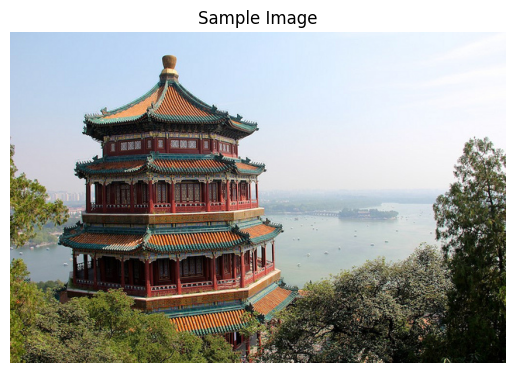

In [47]:
# Viewing the image
plt.imshow(img)
plt.axis("off")
plt.title("Sample Image")
plt.show()

**Encoding the Sample Image using a Protocol Buffer**

In [48]:
# Encoded Image
encoded_data = tf.io.encode_jpeg(img)

# Custom Protobuff for the image
example_for_image = Example(
    features=Features(
        feature={
            "image_data": Feature(bytes_list=BytesList(value=[encoded_data.numpy()]))
        }
    )
)

# Serializing the Image
serialized_image = example_for_image.SerializeToString()
# print(serialized_image)

# Storing the Serialized Image in a TFRecord
with tf.io.TFRecordWriter("encoded_image.tfrecord") as tfrecord:
    tfrecord.write(serialized_image)

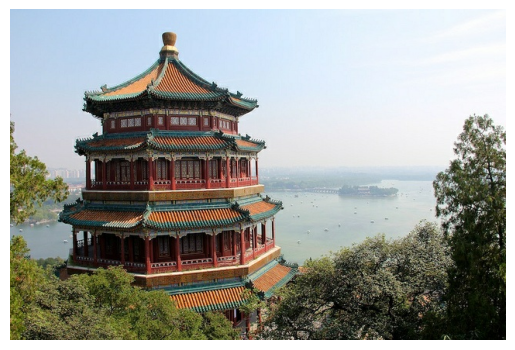

In [49]:
# Loading and Parsing the Image
feature_description = {
    "image_data": tf.io.VarLenFeature(tf.string)
}

# Parsing Function
def parse_image(serialized_example):
    tensor_but_still_encoded_image = tf.io.parse_single_example(serialized_image, feature_description)
    tensor_but_now_decoded_image = tf.io.decode_image(tensor_but_still_encoded_image["image_data"].values[0])
    return tensor_but_now_decoded_image

decoded_image_as_dataset = tf.data.TFRecordDataset("encoded_image.tfrecord").map(parse_image)
for img in decoded_image_as_dataset:
    plt.imshow(img)
    plt.axis("off")
    plt.show()

**Working with Keras Preprocessing Layers**
--

In [50]:
# Implementing a Normalisation Layer using the Keras Lambda Layers
mean = np.mean(X_train.to_numpy(), axis=0, keepdims=True)
std = np.std(X_train.to_numpy(), axis=0, keepdims=True)

# Loading the value of Epsilon
eps = tf.keras.backend.epsilon()

# Creating the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda inputs: (inputs - mean) / (std + eps)),
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])

# Compiling the Model
model.compile(
    loss="mse",
    optimizer="adam"
)

# Training
# model.fit(
#     X_train, y_train, validation_data=(X_valid, y_valid), epochs=20
# )